In [588]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import operator
import random
import math, sys

In [589]:
numcity = 322
cityList = []
for i in range(0,numcity):
    cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))
print(cityList)

[(176, 128), (189, 161), (84, 168), (12, 98), (141, 121), (144, 101), (170, 134), (136, 49), (160, 156), (89, 164), (114, 52), (90, 195), (100, 134), (192, 123), (29, 27), (104, 106), (60, 144), (120, 50), (34, 42), (56, 79), (135, 29), (199, 74), (170, 173), (31, 198), (78, 34), (74, 86), (129, 50), (121, 90), (107, 60), (83, 71), (49, 98), (162, 54), (10, 48), (138, 79), (128, 100), (51, 40), (47, 152), (30, 44), (110, 29), (185, 15), (172, 3), (137, 75), (74, 31), (187, 71), (95, 177), (153, 54), (182, 33), (39, 125), (117, 16), (3, 71), (106, 25), (197, 102), (4, 133), (106, 0), (107, 124), (114, 106), (167, 191), (93, 57), (45, 45), (56, 111), (112, 52), (189, 35), (8, 66), (141, 85), (162, 16), (42, 51), (122, 22), (153, 198), (43, 127), (148, 20), (58, 96), (191, 176), (195, 1), (176, 83), (97, 85), (159, 72), (10, 94), (107, 133), (16, 122), (150, 93), (24, 100), (59, 141), (108, 38), (52, 10), (191, 15), (83, 158), (193, 22), (19, 168), (158, 124), (75, 155), (21, 175), (105, 

In [590]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def distance(self, city):
        return math.hypot(self.x - city.x, self.y - city.y)

    def __repr__(self):
        return f"({self.x}, {self.y})"

In [591]:
def read_cities(size):
    cities = []
    with open(f'C:/Users/luzma/Desktop/MAESTRIA/AED/PRACTICA2/ProblemaViajero/test_data/cities_{size}.data', 'r') as handle:
        lines = handle.readlines()
        for line in lines:
            x, y = map(float, line.split())
            cities.append(City(x, y))
    return cities

In [592]:
def generate_cities(size):
    return [City(x=int(random.random() * 1000), y=int(random.random() * 1000)) for _ in range(size)]

In [593]:
def write_cities_and_return_them(size):
    cities = generate_cities(size)
    with open(f'C:/Users/luzma/Desktop/MAESTRIA/AED/PRACTICA2/ProblemaViajero/test_data/cities_{size}.data', 'w+') as handle:
        for city in cities:
            handle.write(f'{city.x} {city.y}\n')
    return cities

In [594]:
def path_cost(route):
    return sum([city.distance(route[index - 1]) for index, city in enumerate(route)])

In [595]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

In [596]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

In [597]:
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

In [598]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

In [599]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

In [600]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [601]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

In [602]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

In [603]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

In [604]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [605]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration, selectionResults

In [606]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    history = []
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    
    print("Distancia Inicial: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop, selectionResults = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
        history.append(selectionResults)
    
    print("Distancia Final: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute, progress, history

In [607]:

best, progress, history = geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)

Distancia Inicial: 31890.784402371904
Distancia Final: 27604.502571917878


In [608]:
def geneticAlgorithmPlot(progress,i):
    plt.title('Algoritmo Genético', loc = "center", fontdict = {'fontsize':12, 'fontweight':'bold'})
    plt.ylabel('Distancia', fontdict = {'fontsize':12})
    plt.xlabel('Generaciones', fontdict = {'fontsize':12})
    plt.plot(progress)
    plt.savefig('Process' + str(i) + '.png')
    plt.show()

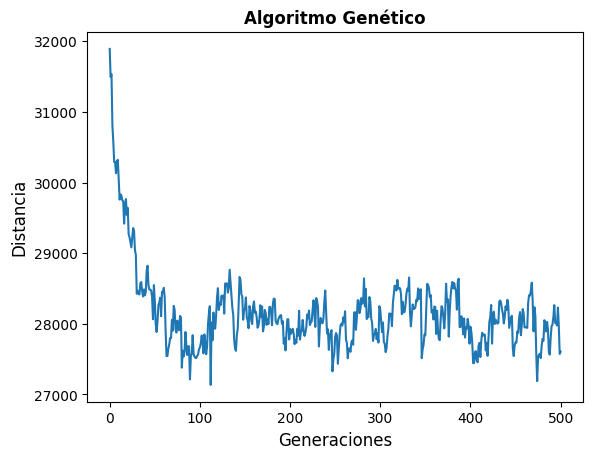

In [609]:
geneticAlgorithmPlot(progress,numcity)

In [610]:
def visualize_tsp(title, cities, i):
    x_list, y_list = [], []
    for city in cities:
        x_list.append(city.x)
        y_list.append(city.y)
    x_list.append(cities[0].x)
    y_list.append(cities[0].y)

    plt.plot(x_list, y_list, 'ro')
    plt.plot(x_list, y_list, 'g', color='gray')
    plt.title(title, loc = "center", fontdict = {'fontsize':12, 'fontweight':'bold'})
    plt.savefig('TSP' + str(i) + '.png')
    plt.show(block=True)

C:\Users\luzma\AppData\Local\Temp\ipykernel_7508\128336628.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x_list, y_list, 'g', color='gray')


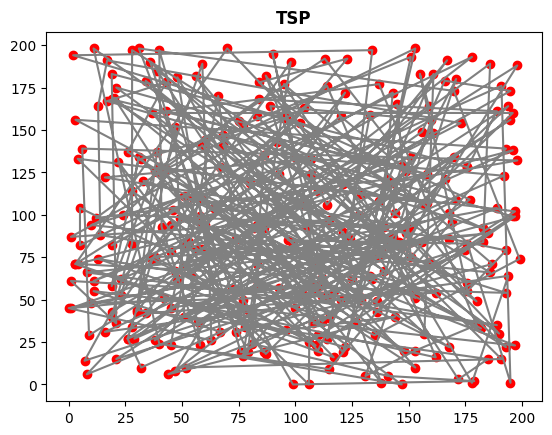

In [611]:
visualize_tsp('TSP', cityList, numcity)

In [612]:
def drawMap(city,best, i):
    for j in city:
        plt.plot(j.x, j.y, "ro")
        #plt.annotate((j.x, j.y))

    for j in range(len(best)):
        try:
            first = best[j]
            secend = best[j + 1]

            plt.plot([first.x, secend.x], [first.y, secend.y],"gray")
        except:
            continue

    first = best[0]
    secend = best[-1]
    plt.plot([first.x, secend.x], [first.y, secend.y])

    plt.title('Mejor TSP', loc = "center", fontdict = {'fontsize':12, 'fontweight':'bold'})
    plt.savefig('Best' + str(i) + '.png')
    plt.show()

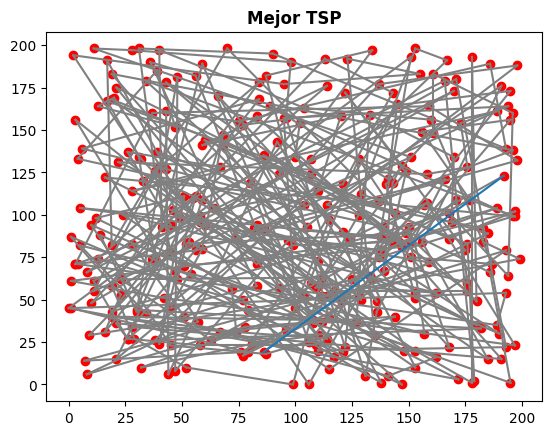

In [613]:
drawMap(cityList,best, numcity)

In [614]:
print(history)

[[44, 11, 81, 5, 53, 2, 22, 16, 57, 41, 76, 67, 30, 12, 28, 4, 91, 43, 79, 82, 58, 45, 86, 92, 34, 73, 37, 35, 74, 90, 3, 10, 52, 41, 54, 21, 94, 63, 36, 51, 79, 56, 98, 91, 68, 65, 60, 55, 67, 18, 12, 47, 53, 87, 12, 29, 23, 29, 88, 56, 13, 64, 99, 84, 35, 52, 83, 38, 65, 7, 86, 57, 99, 10, 50, 9, 63, 87, 40, 83, 24, 59, 3, 76, 66, 58, 13, 56, 58, 99, 12, 64, 63, 11, 12, 0, 27, 48, 94, 97], [1, 71, 0, 30, 39, 55, 63, 3, 51, 68, 6, 23, 2, 4, 20, 13, 10, 75, 9, 5, 95, 71, 5, 41, 28, 33, 42, 69, 43, 14, 73, 91, 14, 89, 88, 84, 11, 46, 82, 42, 12, 21, 14, 62, 94, 28, 9, 59, 70, 32, 65, 66, 47, 36, 98, 68, 98, 0, 90, 45, 31, 4, 65, 26, 75, 22, 70, 73, 24, 41, 16, 52, 80, 89, 58, 84, 64, 20, 75, 43, 37, 7, 51, 25, 73, 79, 17, 87, 42, 11, 30, 7, 45, 87, 82, 73, 42, 85, 79, 92], [98, 0, 74, 35, 75, 4, 6, 20, 3, 26, 70, 1, 13, 7, 14, 2, 60, 12, 88, 8, 66, 93, 58, 21, 6, 57, 37, 27, 52, 65, 94, 51, 98, 57, 71, 7, 71, 46, 17, 1, 15, 96, 3, 39, 90, 52, 72, 83, 50, 40, 67, 61, 1, 32, 95, 34, 6, 25

In [615]:
print(best)

[(192, 123), (141, 85), (1, 61), (42, 51), (197, 23), (158, 107), (124, 86), (153, 10), (33, 120), (84, 178), (19, 58), (29, 27), (52, 10), (99, 0), (111, 59), (16, 122), (197, 99), (34, 179), (105, 93), (93, 124), (134, 197), (87, 182), (115, 39), (195, 1), (186, 66), (21, 175), (110, 29), (81, 24), (32, 10), (175, 79), (122, 172), (147, 129), (143, 119), (139, 67), (149, 126), (109, 57), (133, 64), (106, 0), (20, 169), (13, 164), (47, 152), (39, 185), (4, 133), (139, 93), (157, 106), (114, 52), (9, 29), (45, 78), (38, 126), (31, 198), (90, 195), (193, 139), (186, 189), (75, 155), (43, 161), (44, 6), (92, 143), (136, 49), (125, 62), (122, 22), (110, 73), (46, 103), (108, 38), (19, 40), (74, 31), (72, 56), (24, 100), (162, 54), (107, 60), (86, 92), (26, 27), (21, 36), (114, 27), (83, 94), (151, 84), (171, 109), (176, 60), (82, 92), (166, 121), (136, 43), (131, 5), (96, 157), (98, 190), (28, 197), (11, 198), (151, 134), (74, 86), (147, 0), (79, 44), (77, 50), (14, 88), (30, 43), (48, 18